In [131]:
import sys

import sklearn

import tensorflow as tf

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [132]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.linear_model import Perceptron

data = load_wine()
X = data.data[:, (2, 3)] 
y = (data.target == 0).astype(int)
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[6, 700]])
y_pred

array([0])

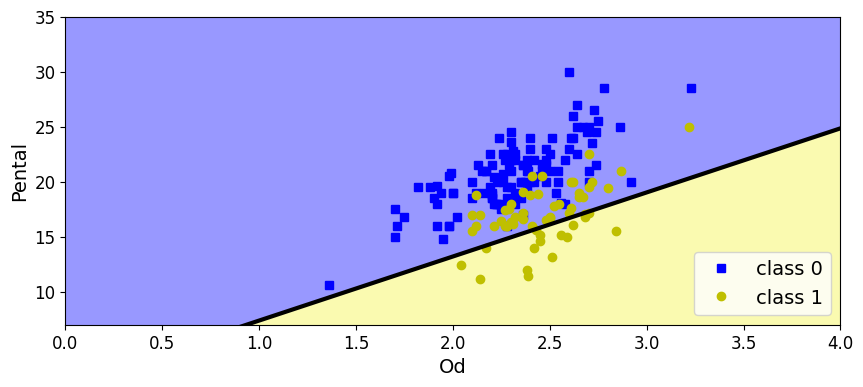

In [133]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 4, 7, 35]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="class 0")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="class 1")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Od", fontsize=14)
plt.ylabel("Pental", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [134]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

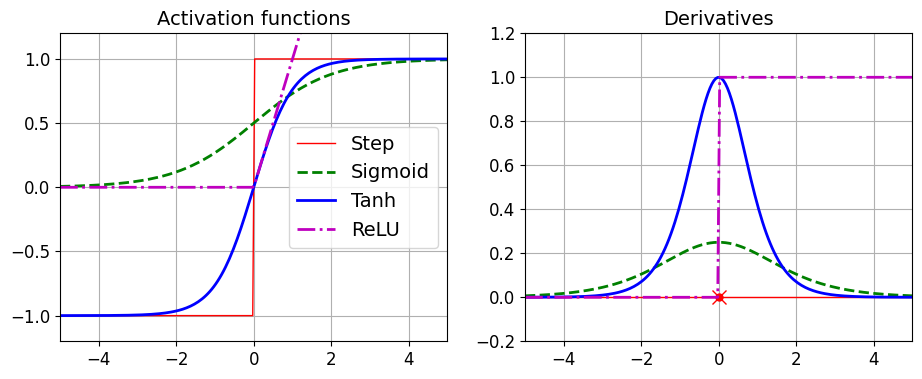

In [135]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)

plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [136]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

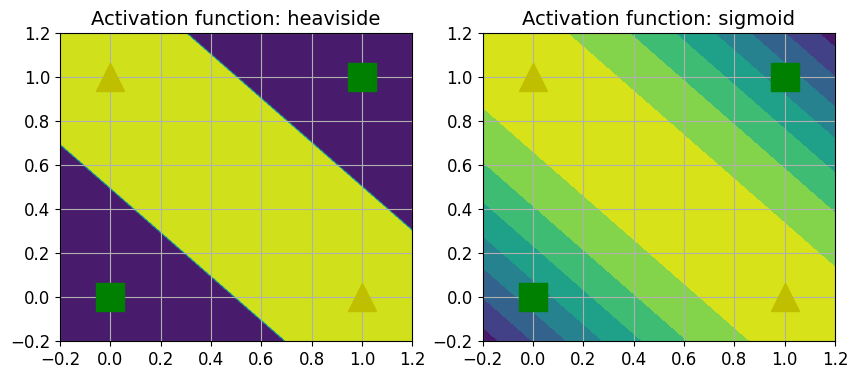

In [137]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### Building an Image Classifier

In [138]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [139]:
X_train_full.shape

(60000, 28, 28)

In [140]:
X_train_full.dtype

dtype('uint8')

In [141]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

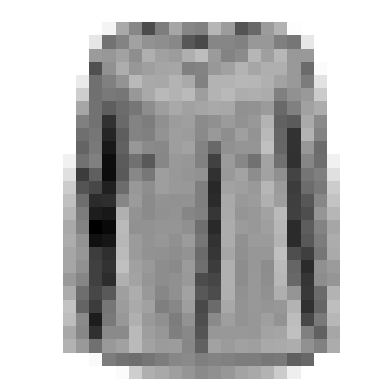

In [142]:
plt.imshow(X_train[13], cmap="binary")
plt.axis('off')
plt.show()

In [143]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [144]:
class_names[y_train[13]]

'Shirt'

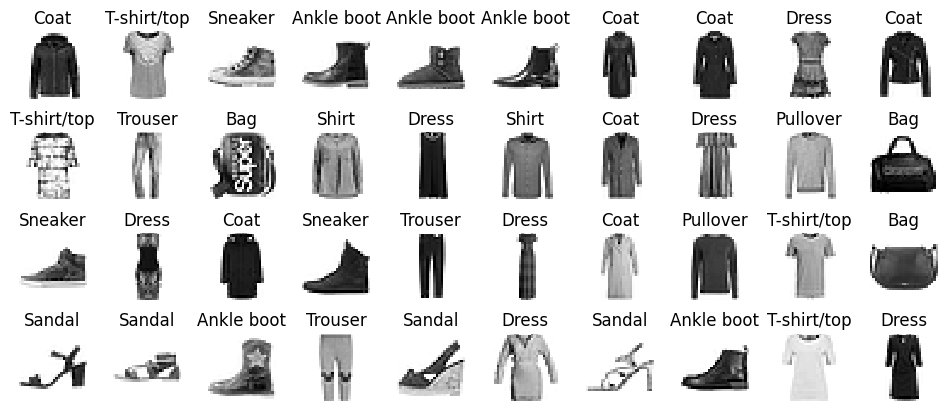

In [145]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [146]:
np.random.seed(42)
tf.random.set_seed(42)

In [147]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

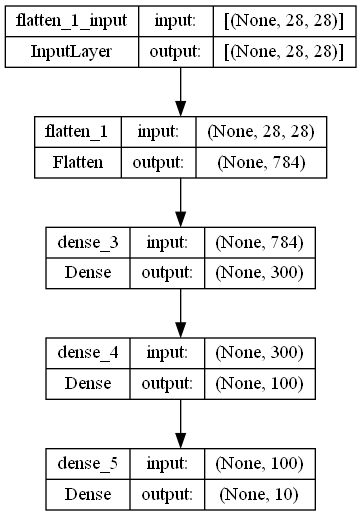

In [148]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [149]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7097 - accuracy: 0.7661 - val_loss: 0.5221 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4859 - accuracy: 0.8300 - val_loss: 0.4370 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4402 - accuracy: 0.8458 - val_loss: 0.5337 - val_accuracy: 0.8046
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8561 - val_loss: 0.3933 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3956 - accuracy: 0.8610 - val_loss: 0.3741 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.8669 - val_loss: 0.3753 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3647 - accuracy: 0.8712 - val_loss: 0.3669 - val_accuracy:

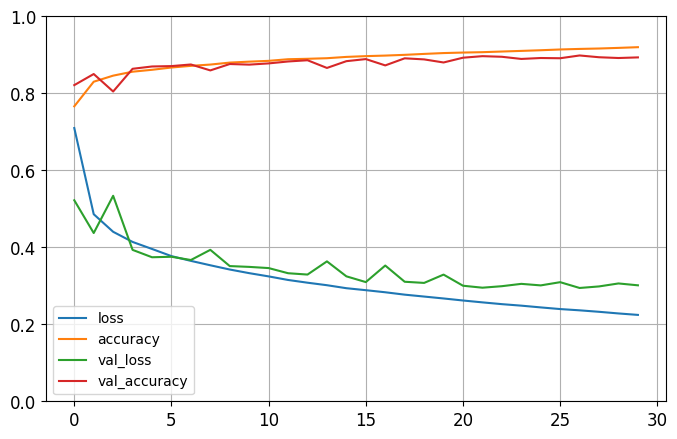

In [150]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [151]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8836


[0.3311466574668884, 0.8835999965667725]

In [152]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 43ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [153]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 17ms/step


array([9, 2, 1], dtype=int64)

In [154]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [155]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

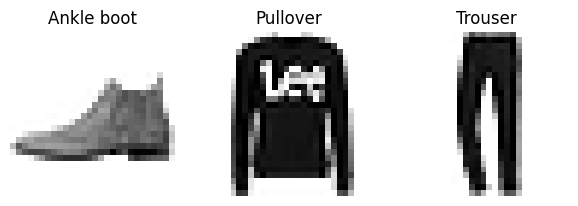

In [156]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Regression MLP

In [157]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [158]:
np.random.seed(42)
tf.random.set_seed(42)

In [159]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0549 - val_loss: 1.1166
Epoch 2/20
363/363 [==============================] - 0s 991us/step - loss: 0.7874 - val_loss: 0.7362
Epoch 3/20
363/363 [==============================] - 0s 981us/step - loss: 0.7055 - val_loss: 0.6821
Epoch 4/20
363/363 [==============================] - 0s 977us/step - loss: 0.6632 - val_loss: 0.6254
Epoch 5/20
363/363 [==============================] - 0s 982us/step - loss: 0.6304 - val_loss: 0.5923
Epoch 6/20
363/363 [==============================] - 0s 968us/step - loss: 0.6018 - val_loss: 0.5646
Epoch 7/20
363/363 [==============================] - 0s 973us/step - loss: 0.5780 - val_loss: 0.5486
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5572 - val_loss: 0.5229
Epoch 9/20
363/363 [==============================] - 0s 973us/step - loss: 0.5379 - val_loss: 0.5030
Epoch 10/20
363/363 [==============================] - 0s 994us/step - loss: 0.5211 - 

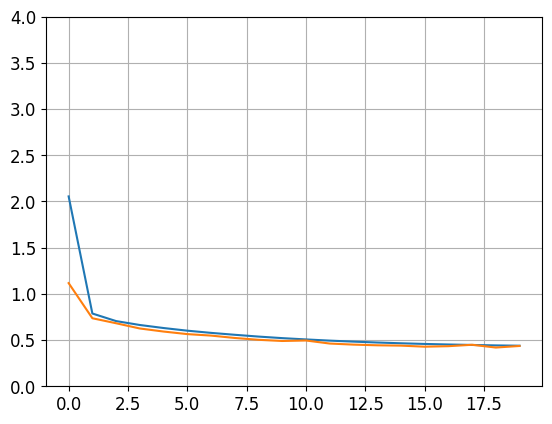

In [163]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 4)
plt.show()

### Functional API

In [164]:
np.random.seed(42)
tf.random.set_seed(42)

In [165]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [166]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [167]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7022 - val_loss: 3.6030
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7361 - val_loss: 0.6475
Epoch 3/20
363/363 [==============================] - 0s 997us/step - loss: 0.6453 - val_loss: 0.7172
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6020 - val_loss: 0.5614
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5669 - val_loss: 0.5432
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5368 - val_loss: 0.5557
Epoch 7/20
363/363 [==============================] - 0s 945us/step - loss: 0.5172 - val_loss: 0.5286
Epoch 8/20
363/363 [==============================] - 0s 948us/step - loss: 0.5001 - val_loss: 0.5393
Epoch 9/20
363/363 [==============================] - 0s 947us/step - loss: 0.4835 - val_loss: 0.4775
Epoch 10/20
363/363 [==============================] - 0s 952us/step - loss: 0.4718 - val_lo

In [168]:
np.random.seed(42)
tf.random.set_seed(42)

In [169]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [170]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8985 - val_loss: 0.8968
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7311 - val_loss: 0.6883
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6351 - val_loss: 0.6473
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5860 - val_loss: 0.5628
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5529 - val_loss: 0.5189
Epoch 6/20
363/363 [==============================] - 0s 989us/step - loss: 0.5288 - val_loss: 0.5257
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5095 - val_loss: 0.5142
Epoch 8/20
363/363 [==============================] - 0s 997us/step - loss: 0.4949 - val_loss: 0.4578
Epoch 9/20
363/363 [==============================] - 0s 987us/step - loss: 0.4820 - val_loss: 0.4708
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4719 - val_loss: 

In [171]:
np.random.seed(42)
tf.random.set_seed(42)

In [172]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [173]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [174]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7099 - main_output_loss: 2.4084 - aux_output_loss: 5.4228 - val_loss: 1.9415 - val_main_output_loss: 1.6270 - val_aux_output_loss: 4.7718
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0452 - main_output_loss: 0.7795 - aux_output_loss: 3.4365 - val_loss: 1.3531 - val_main_output_loss: 1.1635 - val_aux_output_loss: 3.0592
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8449 - main_output_loss: 0.6729 - aux_output_loss: 2.3926 - val_loss: 0.9765 - val_main_output_loss: 0.8384 - val_aux_output_loss: 2.2193
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7497 - main_output_loss: 0.6280 - aux_output_loss: 1.8451 - val_loss: 0.8108 - val_main_output_loss: 0.7043 - val_aux_output_loss: 1.7694
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6935 - main_output_loss: 0.5976 - aux_output_loss: 1.5570 - val_loss

In [175]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [176]:
X_train_full.shape

(60000, 28, 28)

In [177]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

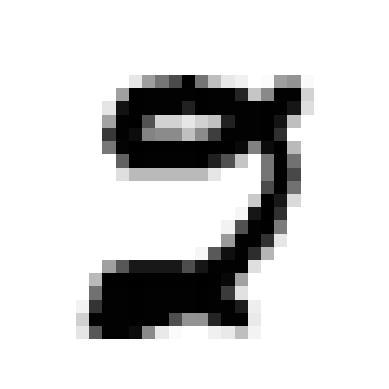

In [178]:
plt.imshow(X_train[13], cmap="binary")
plt.axis('off')
plt.show()

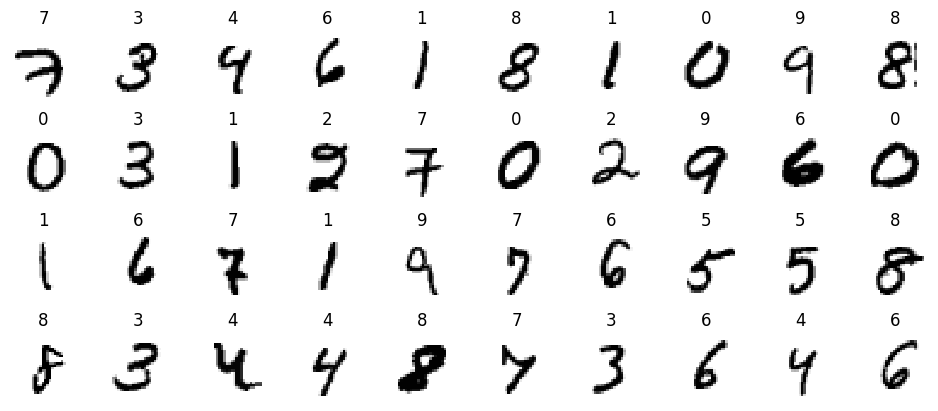

In [179]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [180]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [181]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [182]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [183]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [184]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.5773 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

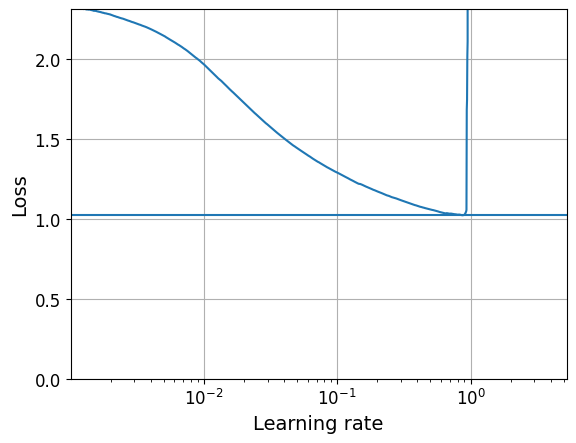

In [185]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [186]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [188]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [189]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [190]:
run_index = 1
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [191]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2342 - accuracy: 0.9277 - val_loss: 0.1100 - val_accuracy: 0.9682
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0935 - accuracy: 0.9716 - val_loss: 0.1105 - val_accuracy: 0.9678
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9790 - val_loss: 0.0691 - val_accuracy: 0.9774
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0707 - val_accuracy: 0.9806
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9883 - val_loss: 0.0908 - val_accuracy: 0.9768
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.0885 - val_accuracy: 0.9770
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0880 - val_ac

In [192]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0769 - accuracy: 0.9784


[0.0768597200512886, 0.9783999919891357]